# EDA: Merged NASA FIRMS and Weather Data

This notebook explores the merged wildfire and weather dataset.

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set plot style
sns.set(style='whitegrid')

Imports and Setup

In [2]:
# Load merged data
with open('../data/merged_firms_weather.json', 'r') as f:
    merged = json.load(f)

# Flatten the structure
df = pd.json_normalize(merged)
df.head()

,weather,event.lat,event.lon,event.date,event.time,event.latitude,event.longitude,event.brightness,event.scan,event.track,event.acq_date,event.acq_time,event.satellite,event.confidence,event.version,event.bright_t31,event.frp,event.daynight
0,None,19.40525,-155.28346,2025-05-05,0126,19.40525,-155.28346,334.94,3.87,1.83,2025-05-05,0126,A,79,6.1NRT,309.01,208.97,D
1,None,19.39636,-155.28789,2025-05-05,0126,19.39636,-155.28789,326.34,3.87,1.83,2025-05-05,0126,A,41,6.1NRT,306.46,121.74,D
2,None,19.41242,-155.28993,2025-05-05,0126,19.41242,-155.28993,324.8,3.87,1.83,2025-05-05,0126,A,38,6.1NRT,306.31,114.78,D
3,None,17.92016,-90.35853,2025-05-05,0319,17.92016,-90.35853,309.68,1.01,1,2025-05-05,0319,T,74,6.1NRT,290.35,6.91,N
4,None,17.91891,-90.36777,2025-05-05,0319,17.91891,-90.36777,311.05,1.01,1,2025-05-05,0319,T,78,6.1NRT,290.28,7.77,N


Load and Flatten the Merged Data

In [3]:
# Load merged data
with open('../data/merged_firms_weather.json', 'r') as f:
    merged = json.load(f)

# Flatten the structure
df = pd.json_normalize(merged)
df.head()

,weather,event.lat,event.lon,event.date,event.time,event.latitude,event.longitude,event.brightness,event.scan,event.track,event.acq_date,event.acq_time,event.satellite,event.confidence,event.version,event.bright_t31,event.frp,event.daynight
0,None,19.40525,-155.28346,2025-05-05,0126,19.40525,-155.28346,334.94,3.87,1.83,2025-05-05,0126,A,79,6.1NRT,309.01,208.97,D
1,None,19.39636,-155.28789,2025-05-05,0126,19.39636,-155.28789,326.34,3.87,1.83,2025-05-05,0126,A,41,6.1NRT,306.46,121.74,D
2,None,19.41242,-155.28993,2025-05-05,0126,19.41242,-155.28993,324.8,3.87,1.83,2025-05-05,0126,A,38,6.1NRT,306.31,114.78,D
3,None,17.92016,-90.35853,2025-05-05,0319,17.92016,-90.35853,309.68,1.01,1,2025-05-05,0319,T,74,6.1NRT,290.35,6.91,N
4,None,17.91891,-90.36777,2025-05-05,0319,17.91891,-90.36777,311.05,1.01,1,2025-05-05,0319,T,78,6.1NRT,290.28,7.77,N


Basic Info and Statistics

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   weather           0 non-null      object 
 1   event.lat         998 non-null    float64
 2   event.lon         998 non-null    float64
 3   event.date        998 non-null    object 
 4   event.time        998 non-null    object 
 5   event.latitude    998 non-null    object 
 6   event.longitude   998 non-null    object 
 7   event.brightness  998 non-null    object 
 8   event.scan        998 non-null    object 
 9   event.track       998 non-null    object 
 10  event.acq_date    998 non-null    object 
 11  event.acq_time    998 non-null    object 
 12  event.satellite   998 non-null    object 
 13  event.confidence  998 non-null    object 
 14  event.version     998 non-null    object 
 15  event.bright_t31  998 non-null    object 
 16  event.frp         998 non-null    object 
 1

In [5]:
df.describe(include='all')

,weather,event.lat,event.lon,event.date,event.time,event.latitude,event.longitude,event.brightness,event.scan,event.track,event.acq_date,event.acq_time,event.satellite,event.confidence,event.version,event.bright_t31,event.frp,event.daynight
count,0,998.000000,998.000000,998,998,998,998,998,998,998,998,998,998,998,998,998,998,998
unique,0,NaN,NaN,2,48,998,997,895,148,78,2,48,2,92,1,822,894,2
top,NaN,NaN,NaN,2025-05-05,1524,42.68171,-107.67792,319.38,1,1,2025-05-05,1524,T,100,6.1NRT,297.38,21.37,D
freq,NaN,NaN,NaN,817,93,1,2,5,75,99,817,93,570,89,998,4,3,678
mean,NaN,25.720391,-96.518131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,8.509927,10.697082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,17.522700,-155.289930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,18.839485,-103.063343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,22.322500,-97.588980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,30.343843,-89.195922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Visualize Missing Data

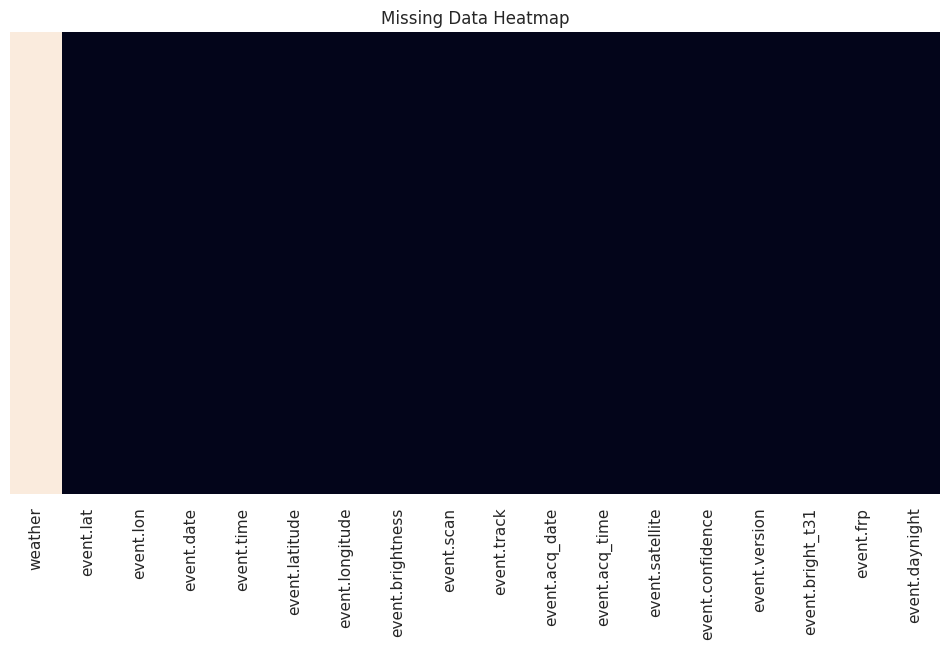

In [6]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)
plt.title('Missing Data Heatmap')
plt.show()

 Plot Distributions of Key Variables

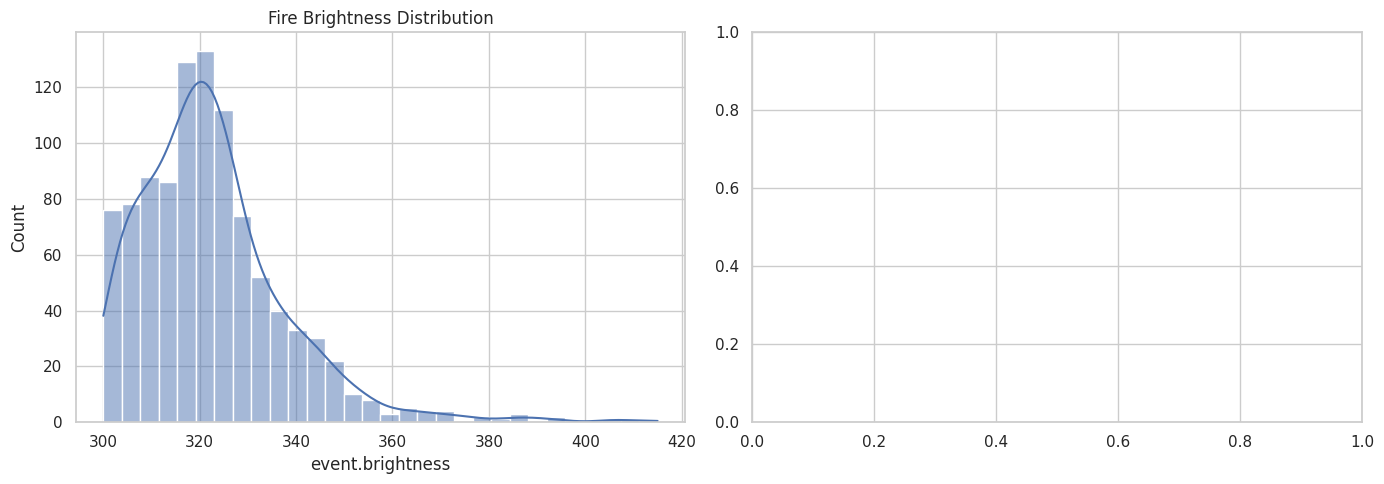

In [7]:
# Example: Fire brightness and temperature
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(df['event.brightness'].astype(float), bins=30, ax=axes[0], kde=True)
axes[0].set_title('Fire Brightness Distribution')
if 'weather.tavg' in df.columns:
    sns.histplot(df['weather.tavg'].astype(float), bins=30, ax=axes[1], kde=True)
    axes[1].set_title('Average Temperature Distribution')
plt.tight_layout()
plt.show()

Correlation Heatmap (Weather & Fire Features)

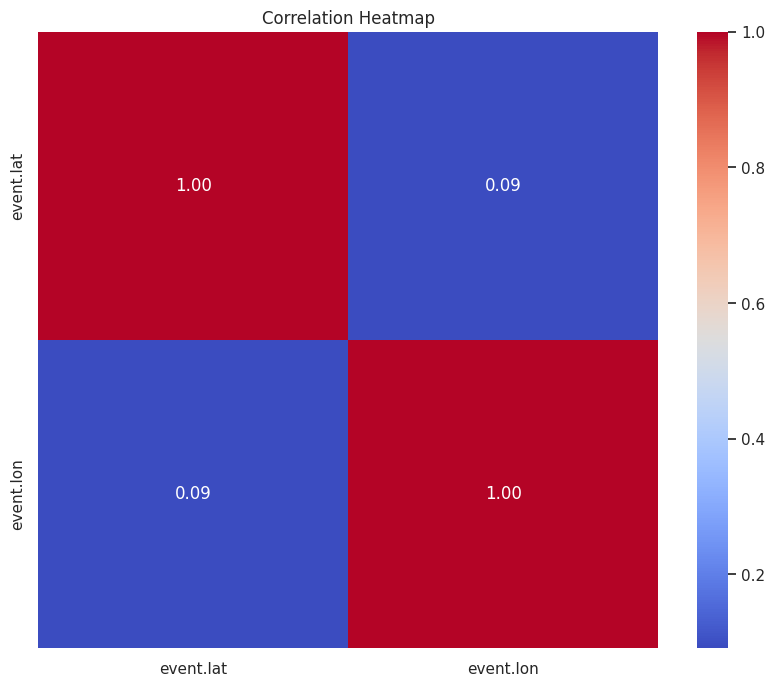

In [8]:
# Select numeric columns for correlation
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr = df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()